In [108]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os


/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-water-facility-2013-2016.csv
/kaggle/input/indian-school-education-statistics/schools-with-girls-toilet-2013-2016.csv
/kaggle/input/indian-school-education-statistics/gross-enrollment-ratio-2013-2016.csv
/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-comps-2013-2016.csv
/kaggle/input/indian-school-education-statistics/schools-with-boys-toilet-2013-2016.csv
/kaggle/input/indian-school-education-statistics/percentage-of-schools-with-electricity-2013-2016.csv
/kaggle/input/indian-school-education-statistics/dropout-ratio-2012-2015.csv
/kaggle/input/india-states/Igismap/Indian_States.shp
/kaggle/input/india-states/Igismap/Indian_States.prj
/kaggle/input/india-states/Igismap/Indian_States.dbf
/kaggle/input/india-states/Igismap/Indian_States.shx


<strong><h1>    INDIAN SCHOOL EDUCATION ANALYSIS - SCHOOLS HAVING COMPUTERS FOR STUDENTS USE

In [131]:
df_comp = pd.read_csv('percentage-of-schools-with-comps-2013-2016.csv')
df_comp.sort_values(by='year',inplace=True)
df_comp['State_UT'].replace({
    'MADHYA PRADESH':'Madhya Pradesh',
    'Pondicherry':'Puducherry',
    'Uttaranchal':'Uttar Pradesh'
},inplace=True)
df_comp.head()

,State_UT,year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,30.40,73.68,89.74,0.00,100.00,97.92,0.00,0.00,100.00,0.00,53.06
33,Gujarat,2013-14,24.74,90.44,96.98,75.23,92.27,93.98,84.82,65.19,74.75,56.36,72.08
36,Haryana,2013-14,7.43,74.87,94.80,27.69,97.39,86.07,94.06,0.00,28.21,0.00,44.12
39,Himachal Pradesh,2013-14,3.75,82.75,94.83,14.38,81.13,92.28,50.00,100.00,60.00,33.33,22.49
42,Jammu And Kashmir,2013-14,3.60,18.94,87.03,8.82,71.43,54.55,32.58,35.29,72.49,66.67,16.73


<strong><h1>    Percentage of schools with computers

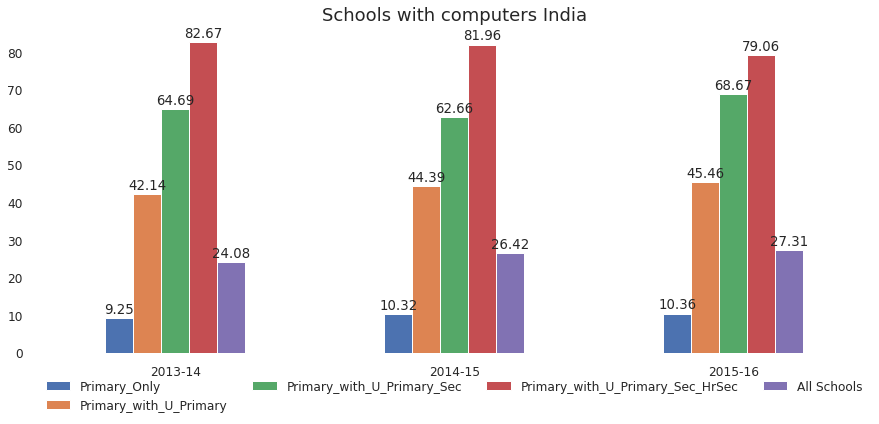

In [110]:
columns_tolot = ['Primary_Only','Primary_with_U_Primary','Primary_with_U_Primary_Sec','Primary_with_U_Primary_Sec_HrSec','All Schools']
sns.set(font_scale = 1.11)
sns.set_style("white")

filt1 = (df_comp['State_UT'] =='All India')
ax = df_comp.loc[filt1][columns_tolot].plot.bar(figsize=(15,6))
sns.despine(left=True, bottom=True)

ax.set_xticklabels(np.arange(3))
ax.set_title('Schools with computers India',size=18)
ax.set_xticklabels(list(df_comp.loc[filt1]['year']))
for tick in ax.get_xticklabels():
    tick.set_rotation(-0)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)
    

In [111]:
filt_year = df_comp['year'] =='2015-16'
df_comp_latest = df_comp[filt_year]
df_comp_latest.sort_values(by='All Schools',ascending = False,inplace =True)

# Top twelve states with computers are as follows:
<br>

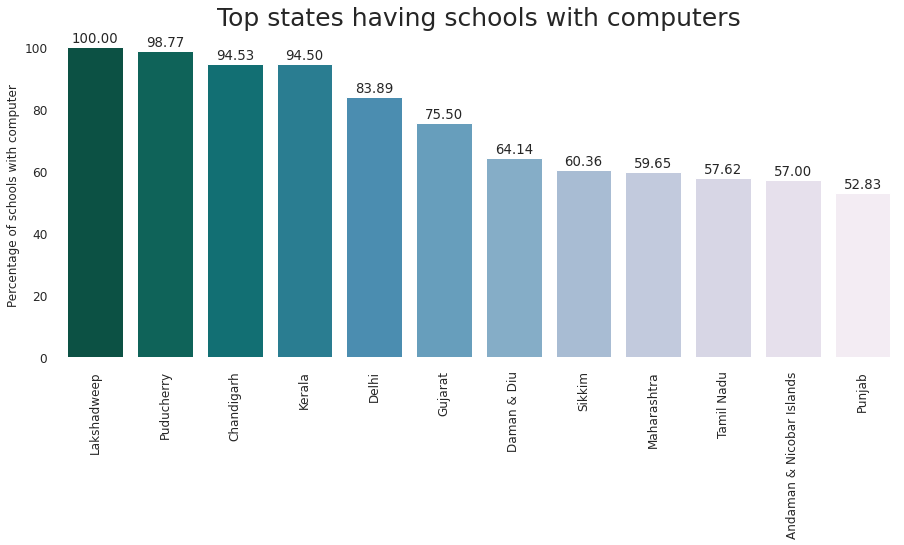

In [112]:
fig,ax = plt.subplots(figsize=(15,6))
sns.set(font_scale = 1.11)
sns.set_style("white")
ax = sns.barplot(x="State_UT", y="All Schools",palette='PuBuGn_r',data=df_comp_latest.head(12))
sns.despine(left=True, bottom=True)

for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(12)
ax.set_xlabel('')
ax.set_ylabel('Percentage of schools with computer',fontsize=12)
ax.set_title('Top states having schools with computers', fontsize=25)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


# Bottom twelve states with computers are as follows:
<br>

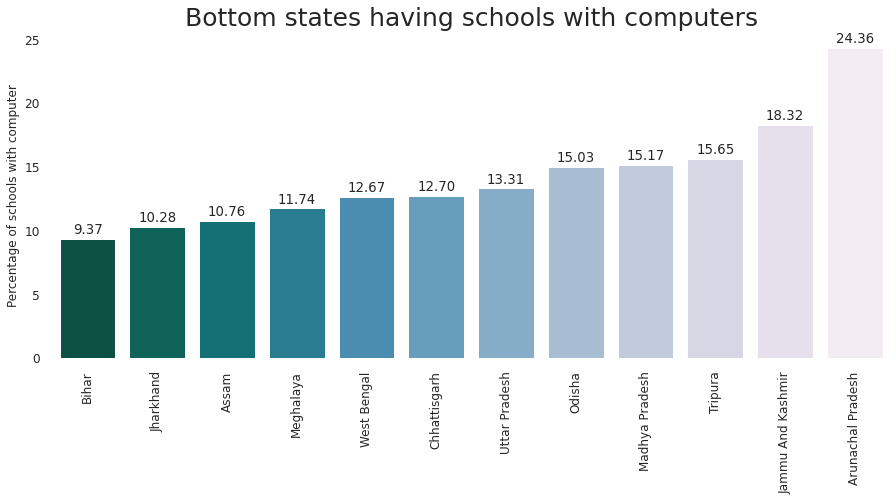

In [113]:
fig,ax = plt.subplots(figsize=(15,6))
sns.set(font_scale = 1.11)
sns.set_style("white")
ax = sns.barplot(x="State_UT", y="All Schools",palette='PuBuGn_r',data=df_comp_latest[::-1].head(12))
sns.despine(left=True, bottom=True)

for item in ax.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(12)
ax.set_xlabel('')
ax.set_ylabel('Percentage of schools with computer',fontsize=12)
ax.set_title('Bottom states having schools with computers', fontsize=25)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

<strong><h2>visualization of different states with respect to computers in schools
<br>

In [114]:
def state_to_plot(state):
    sns.set(font_scale = 1.11)
    sns.set_style("white")

    filt_state = (df_comp['State_UT'] == state)
    ax = df_comp.loc[filt_state][columns_tolot].plot.bar(figsize=(15,6))
    sns.despine(left=True, bottom=True)
    #label and title
    ax.set_xticklabels(np.arange(3))
    ax.set_title(f'{state} analysis with respect to computers in schools',size=21)
    ax.set_xticklabels(list(df_comp.loc[filt_state]['year']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(-0)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    #adjust legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)


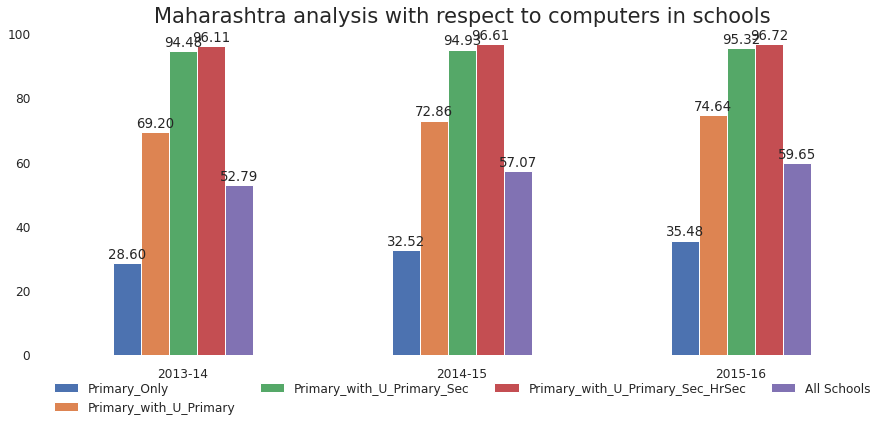

In [115]:
state_to_plot('Maharashtra')

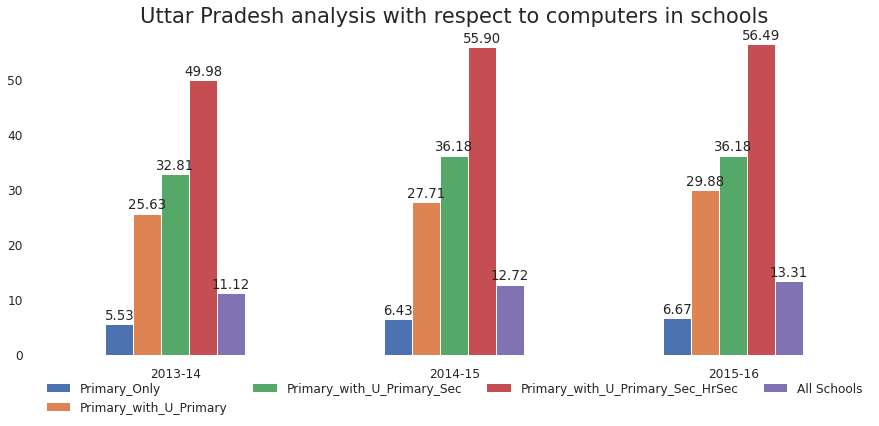

In [117]:
state_to_plot('Uttar Pradesh')

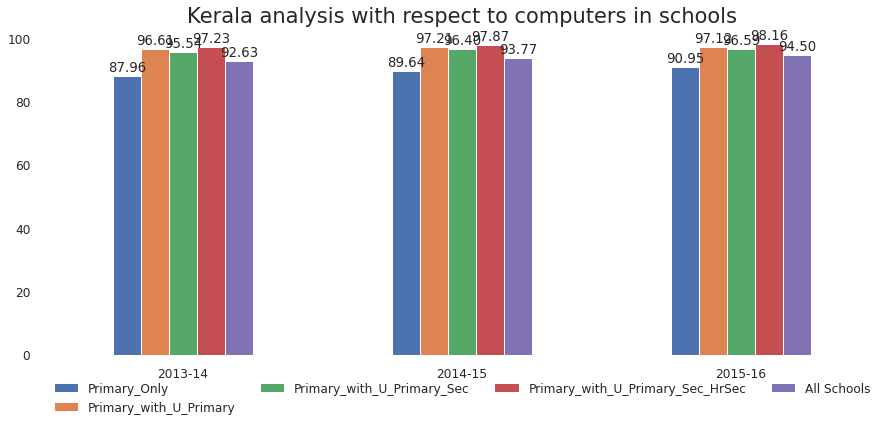

In [118]:
state_to_plot('Kerala')

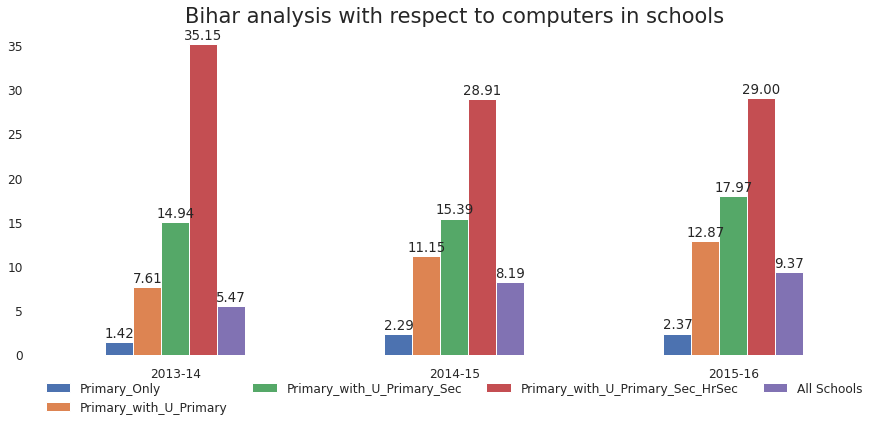

In [119]:
state_to_plot('Bihar')

<strong><h1>Visualizing the data in a map
<br>

In [121]:
states = gpd.read_file('/kaggle/input/india-states/Igismap/Indian_States.shp')
states['st_nm'].replace({
    'Andaman & Nicobar Island':'Andaman & Nicobar Islands',
    'Arunanchal Pradesh':'Arunachal Pradesh',
    'NCT of Delhi':'Delhi',
    'Jammu & Kashmir':'Jammu And Kashmir',
    'Dadara & Nagar Havelli':'Dadra & Nagar Haveli'    
},inplace=True)

df_comp.rename(columns={
    'State_UT':'state'
},inplace=True)

states.rename(columns={
    'st_nm':'state'
},inplace=True)

Text(0.5, 0.98, 'Schools with Computers in different states of India')

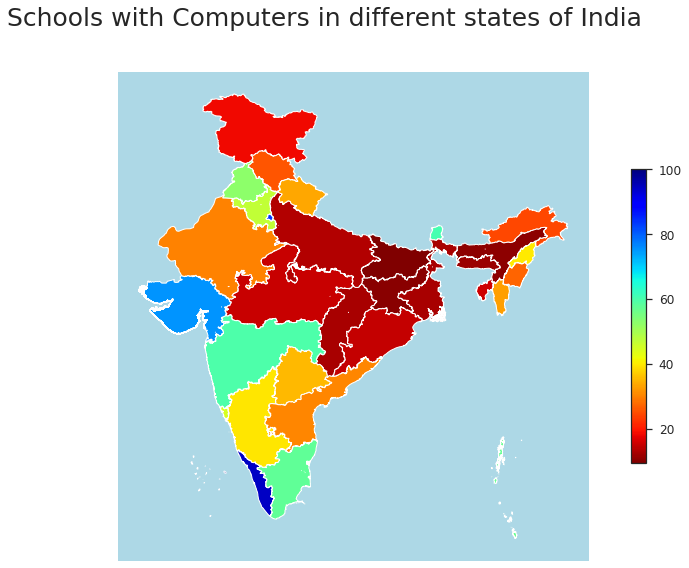

In [122]:
latest_filt = df_comp['year'] =='2015-16'
states_op = states.merge(df_comp.loc[latest_filt].sort_values(by='state'),on='state')
fig,ax = plt.subplots(figsize=(15,9))
states_op.plot(column='All Schools',cmap='jet_r',figsize=(7,7),
                    legend=True,ax=ax,legend_kwds={'label': "",'orientation': "vertical",'shrink': 0.6})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([]) 
ax.set_yticks([]) 
for item in ax.get_xticklabels():
    item.set_visible(False)
for item in ax.get_yticklabels():
    item.set_visible(False) 
ax.set_facecolor('lightblue')
fig.suptitle('Schools with Computers in different states of India', fontsize=25)

Text(0.5, 0.98, 'Breakdown of Schools with computer in India according to classes')

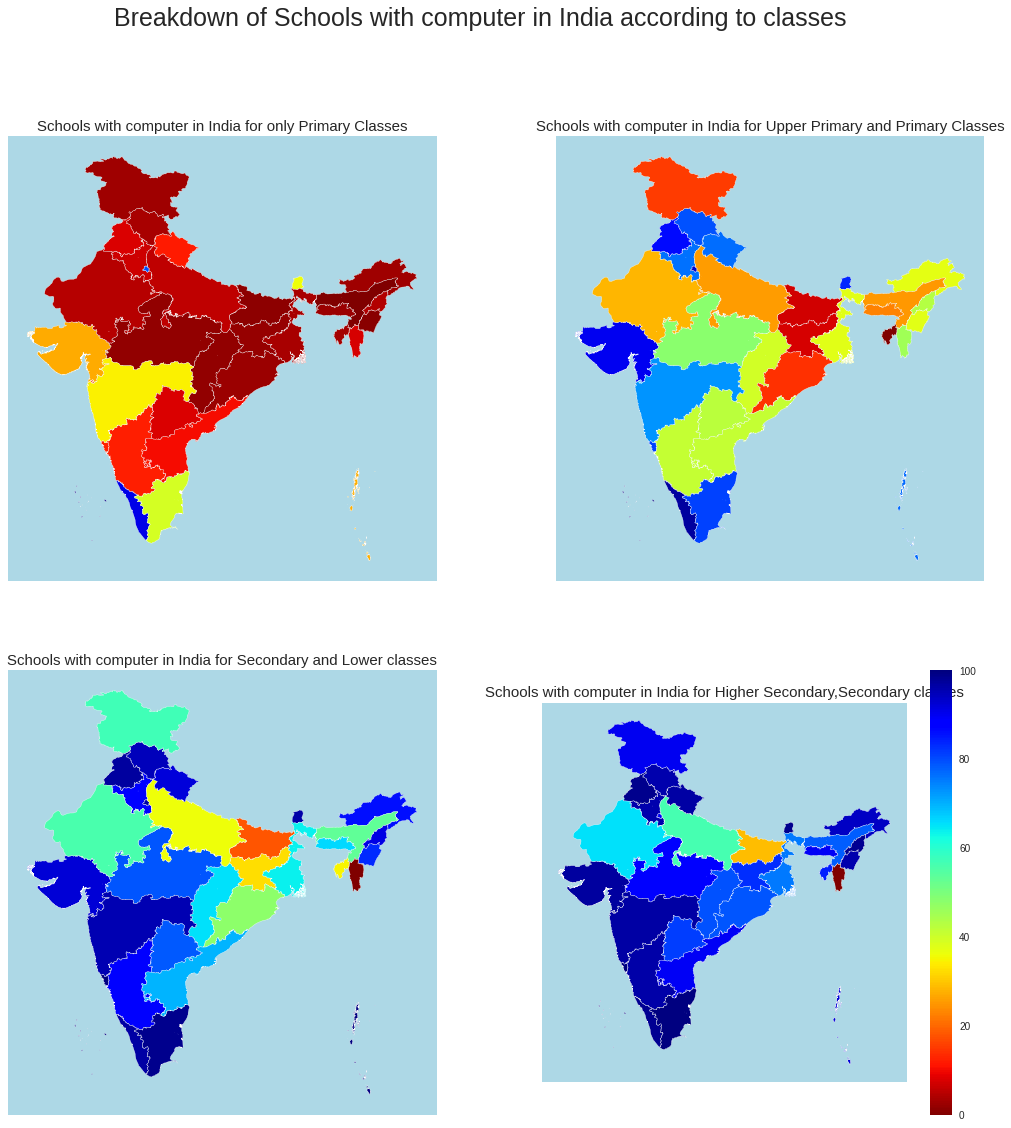

In [125]:
fig,ax = plt.subplots(2,2,figsize=(18,18))
plt.style.use('seaborn')
states_op.plot(column='Primary_Only',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,0])
ax[0,0].set_title('Schools with computer in India for only Primary Classes',fontsize=15)
states_op.plot(column='Primary_with_U_Primary',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[0,1])
ax[0,1].set_title('Schools with computer in India for Upper Primary and Primary Classes',fontsize=15)
states_op.plot(column='Primary_with_U_Primary_Sec',cmap='jet_r',figsize=(9,9),
                    legend=False,ax=ax[1,0])
ax[1,0].set_title('Schools with computer in India for Secondary and Lower classes',fontsize=15)
states_op.plot(column='Primary_with_U_Primary_Sec_HrSec',cmap='jet_r',figsize=(9,9),
                    legend=True,ax=ax[1,1])
ax[1,1].set_title('Schools with computer in India for Higher Secondary,Secondary classes',fontsize=15)
ax[0,0].set_facecolor('lightblue')
ax[0,1].set_facecolor('lightblue')
ax[1,0].set_facecolor('lightblue')
ax[1,1].set_facecolor('lightblue')


for i in np.arange(2):
    for j in np.arange(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        ax[i,j].spines['left'].set_visible(False)
        ax[i,j].spines['bottom'].set_visible(False)
        for item in ax[i,j].get_xticklabels():
            item.set_visible(False)
        for item in ax[i,j].get_yticklabels():
            item.set_visible(False) 
        ax[i,j].set_xticks([]) 
        ax[i,j].set_yticks([]) 
fig.suptitle('Breakdown of Schools with computer in India according to classes', fontsize=25)